
---

**Bagging with `estimator = DecisionTreeClassifier()` is not same as `RandomForestClassifier`**

---


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()


(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.927488,0.662455,2.755646,0.339027,-0.506423,1
1,-0.836303,0.565386,1.033535,-0.387039,-0.017853,1
2,0.172927,-1.472856,1.508918,-2.973642,1.216875,0
3,0.677332,-0.772536,1.709047,2.334242,0.833586,1
4,-1.722543,-2.357148,2.888205,1.032368,-3.846442,1


# **Bagging** with `estimator = DecisionTreeClassifier` and `max_features=2`

In [4]:
bag = BaggingClassifier(max_features=2)

In [5]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

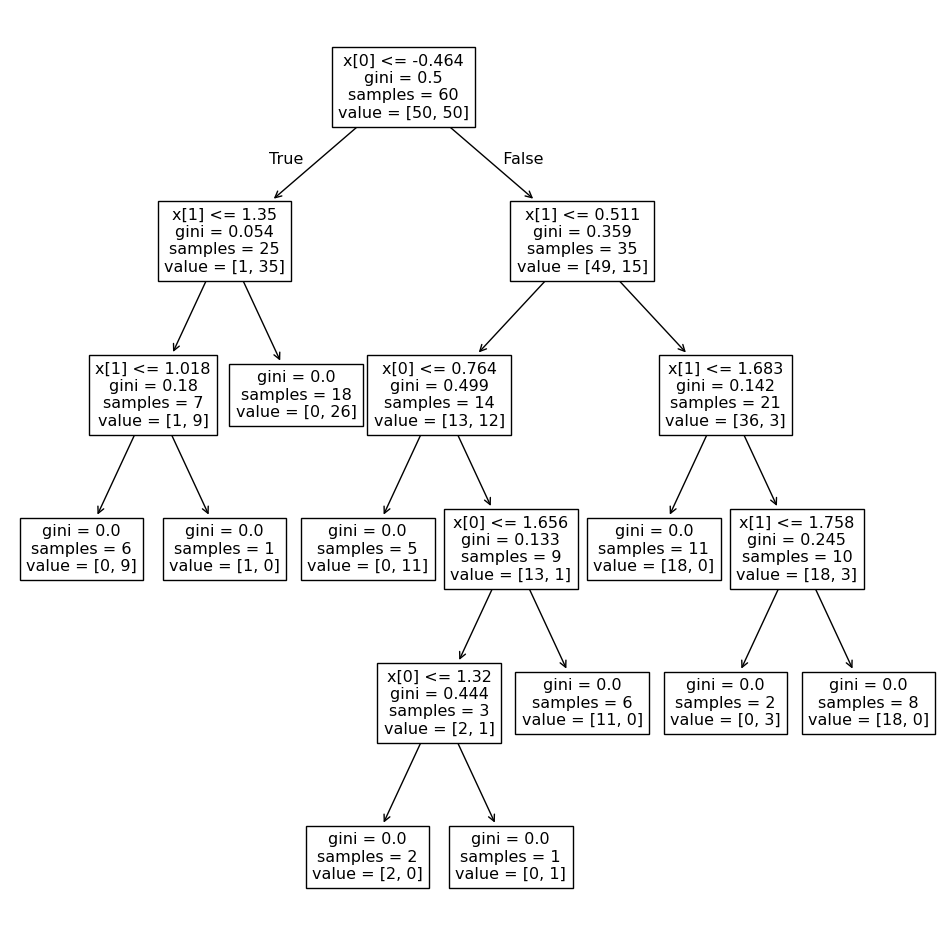

In [7]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()


> Tree Level sampling of features is done in Bagging.

> Columns are decided before the tree is made, thats why we see only two columns in the whole tree.



```
Trees can become highly correlated if some features dominate, reducing the benefit of ensembling.
```



# **Random Forest** with columns sampling and `max_features=2`

In [8]:
rf = RandomForestClassifier(max_features=2)

In [11]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

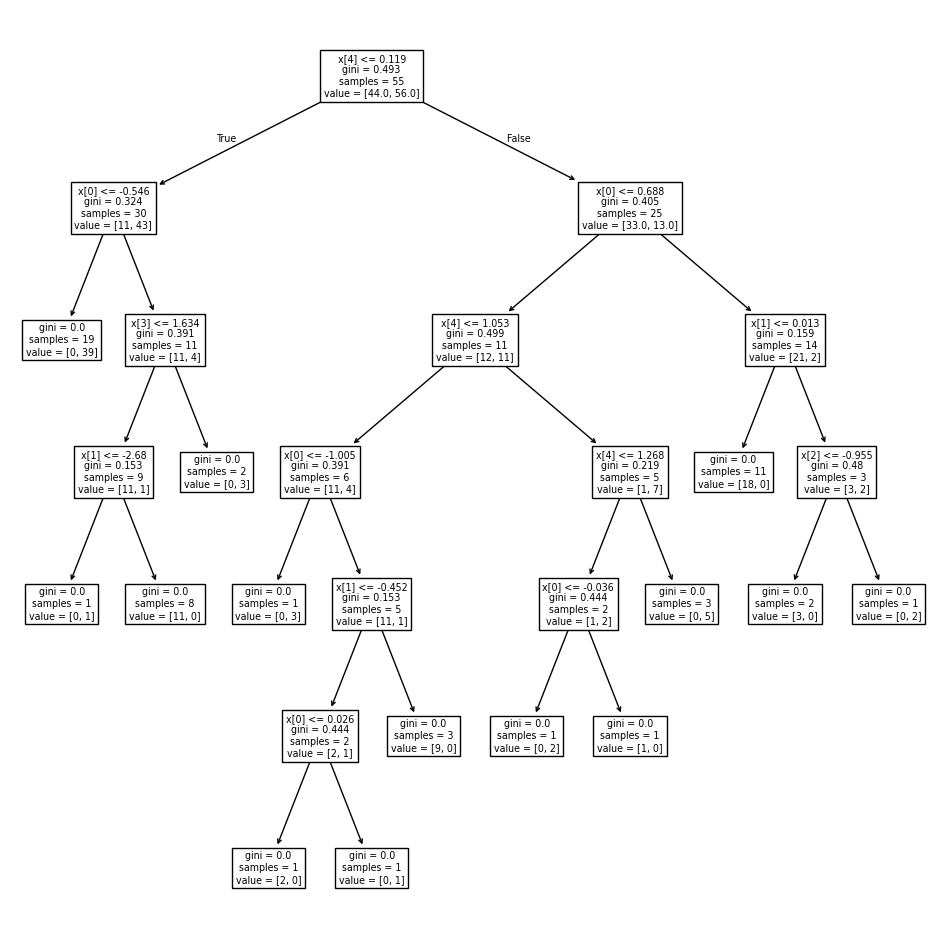

In [12]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

> Node level feature sampling is done in Random Forest.

> thats why we multiple columns in the whole tree. For every node, two features will be randomly sampled.



```
This extra randomness decorrelates the trees, improving generalization and reducing overfitting.
```

